# Decision Tree for Wine Dataset

1. to change data to 0,1 for the quality first.
2. to add in pearson correlation and add in the 4 main features to build the decision tree
3. to add in PCA (add the diagram for PCA) and build the decision tree
4. try out with gini and entropy and see the differences
5. try out the accuracy and time for above. 
6. from the best result above, test the best accuracy from the loop to test maxdepth,minsamples,minsplit

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv('winequality-red.csv').dropna()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# to change the quality to 2 classes only (1-good,0-bad)
def myconverterfunction(_quality):
    if _quality > 5:
        return 1
    else:
        return 0

df['quality'] = df['quality'].apply(myconverterfunction)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [4]:
df['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

In [5]:
#to use pearson correlation below:

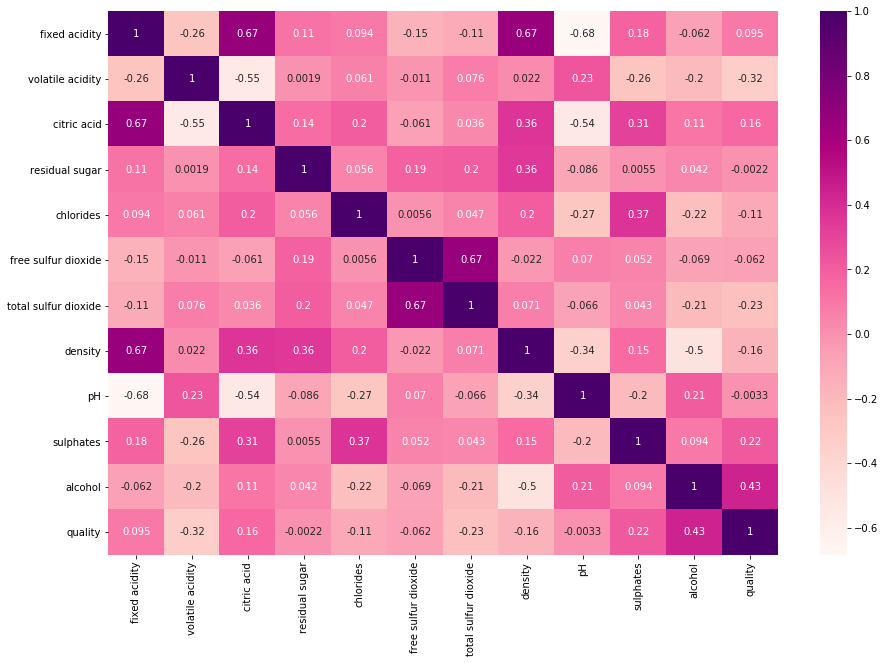

In [6]:
colormap = plt.cm.RdPu
cor = df.corr()
plt.figure(figsize=(15,10))
sb.heatmap(cor,cmap=colormap,annot=True)

In [7]:
# to list the features with above 0.2 correlations

In [8]:
target = 'quality'
candidates = cor.index[
    (cor[target] > 0.2) | (cor[target] < -0.2)
].values
candidates = candidates[candidates != target]
print('Correlated to', target, ': ', candidates)


Correlated to quality :  ['volatile acidity' 'total sulfur dioxide' 'sulphates' 'alcohol']


In [9]:
# to use Principal Component Analysis (PCA) to capture the maximum variance

In [103]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

for i in np.arange(1, 12,1):
    y = df.loc[:,'quality'].values
    x = StandardScaler().fit_transform(df.iloc[:,0:-1])

    pca = PCA(n_components=i)
    pc = pca.fit_transform(x)
    print('i=',i,':',pca.explained_variance_ratio_)
    print(pca.explained_variance_ratio_.sum(),'\n')

    
'''pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(1,11,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axis([0, 11, 0.2, 1.1])'''



i= 1 : [0.28173931]
0.28173931278817294 

i= 2 : [0.28173931 0.1750827 ]
0.4568220118429409 

i= 3 : [0.28173931 0.1750827  0.1409585 ]
0.5977805108224634 

i= 4 : [0.28173931 0.1750827  0.1409585  0.11029387]
0.7080743772386747 

i= 5 : [0.28173931 0.1750827  0.1409585  0.11029387 0.08720837]
0.795282747361036 

i= 6 : [0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439]
0.8552471350764369 

i= 7 : [0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439
 0.05307193]
0.9083190640939519 

i= 8 : [0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439
 0.05307193 0.03845061]
0.946769673153769 

i= 9 : [0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439
 0.05307193 0.03845061 0.0313311 ]
0.9781007746827458 

i= 10 : [0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439
 0.05307193 0.03845061 0.0313311  0.01648483]
0.9945856080071008 

i= 11 : [0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439
 0.05307193 0.03

"pca = PCA().fit(x)\nplt.plot(np.cumsum(pca.explained_variance_ratio_))\nplt.xlim(1,11,1)\nplt.xlabel('Number of components')\nplt.ylabel('Cumulative explained variance')\nplt.axis([0, 11, 0.2, 1.1])"

In [11]:
# build decision tree with all columns

In [78]:
data = df.iloc[:,0:-1] # independent variables
target = df['quality']  # dependent variable: y

import datetime
begin_time = datetime.datetime.now()

# import train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, random_state = 42)

# import decision tree model from sklearn
from sklearn.tree import DecisionTreeClassifier

# instantiate a decision tree model. All parameters can be omited to use default ones.
# details please check https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
dt = DecisionTreeClassifier(max_depth= 4) 
dt.fit(x_train, y_train) # train our model
y_pred = dt.predict(x_test) # let the model predict the test data

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

print('Time for processing: ',datetime.datetime.now()-begin_time)

from sklearn.metrics import confusion_matrix
confusion_matrix (y_test, y_pred, labels = [1,0])

0.715
Time for processing:  0:00:00.033979


array([[156,  66],
       [ 48, 130]], dtype=int64)

#Average time and accuracy for decision tree-all features

In [132]:
data = df.iloc[:,0:-1] # independent variables
target = df['quality']  # dependent variable: y

def decTreeScoreall():
    begin_time = datetime.datetime.now()
    x_train, x_test, y_train, y_test = train_test_split(data, target, random_state = 42)

    dt = DecisionTreeClassifier(criterion ='entropy',max_depth =4)
    dt.fit(x_train, y_train) 

    y_pred = dt.predict(x_test)
    accuracy=accuracy_score(y_test, y_pred)
    timespent=datetime.datetime.now()-begin_time
    return accuracy,timespent  

In [133]:
runs = 100 #to loop through and get average timing,and average accuracy to be more accurate
totaltime = datetime.timedelta()
totaltime1 = datetime.timedelta()
totalaccuracy1=0.00;
for i in np.arange(1, runs, 1):
    totalaccuracy,totaltime=decTreeScoreall()
    totalaccuracy1=totalaccuracy1+totalaccuracy
    totaltime1=totaltime1+totaltime

print('Average Time for decision tree processing:',totaltime1/runs)
print('Average accuracy for decision tree processing:',totalaccuracy1/runs)

Average Time for decision tree processing: 0:00:00.007366
Average accuracy for decision tree processing: 0.7127999999999993


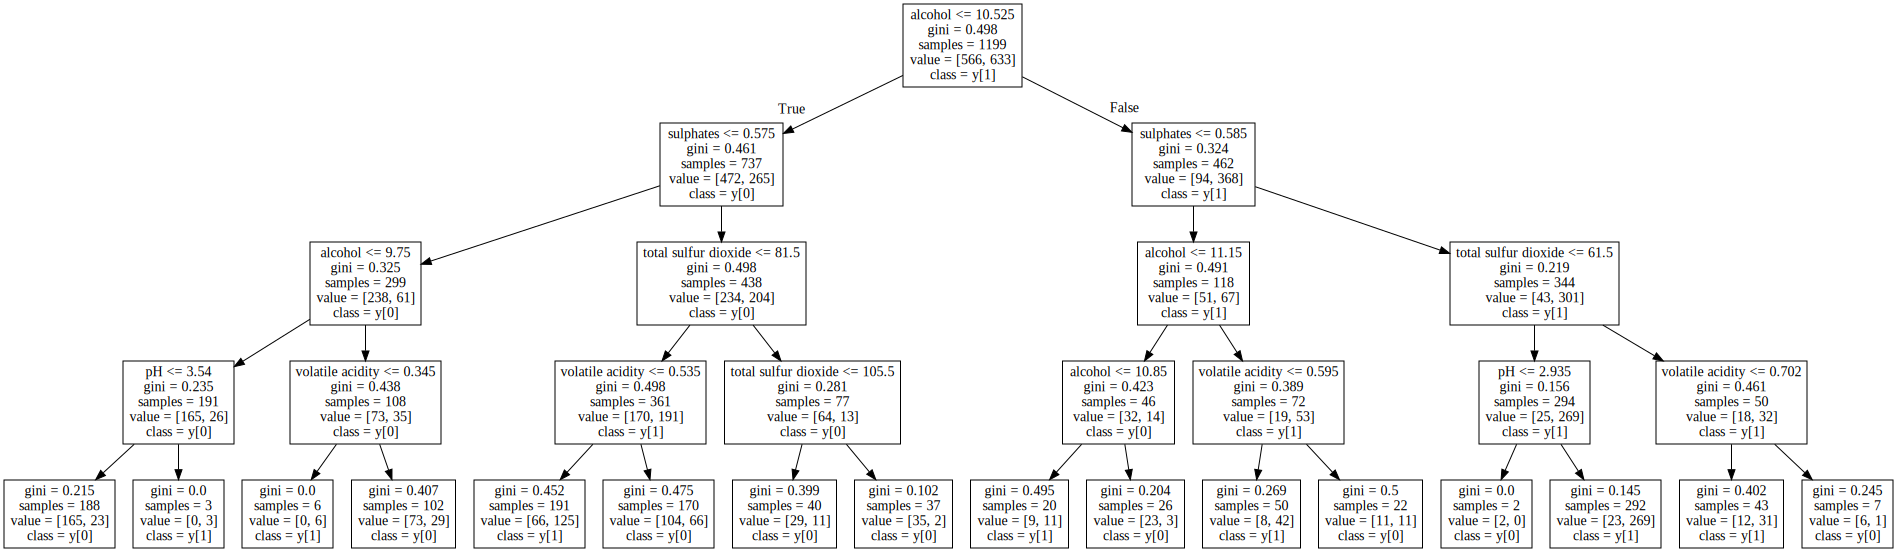

In [61]:
from sklearn import tree
import graphviz
from graphviz import Source

Source(tree.export_graphviz(dt, out_file=None, class_names=True, feature_names= x_train.columns)) # display the tree, with no output file

In [62]:
# build decision tree with above 20% correlation (pearson correlation) - default settings

In [136]:
data1 = df.loc[:,['volatile acidity','total sulfur dioxide', 'sulphates', 'alcohol']] # independent variables
target1 = df['quality']  # dependent variable: y
data1

import datetime
begin_time = datetime.datetime.now()

# import train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data1, target1, random_state = 42)

# import decision tree model from sklearn
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 42)
dt.fit(x_train, y_train) # train our model
y_pred = dt.predict(x_test) # let the model predict the test data

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

print('Time for processing: ',datetime.datetime.now()-begin_time)

0.7175
Time for processing:  0:00:00.014993


average accuracy and timing for Pearson correlation:

In [82]:
data1 = df.loc[:,['volatile acidity','total sulfur dioxide', 'sulphates', 'alcohol']] # independent variables
target1 = df['quality']  # dependent variable: y
data1

def decTreeScorepc4():
    begin_time = datetime.datetime.now()
    x_train, x_test, y_train, y_test = train_test_split(data1, target1, random_state = 42)

    dt = DecisionTreeClassifier(criterion ='entropy',max_depth =4,random_state = 42)
    dt.fit(x_train, y_train) 

    y_pred = dt.predict(x_test)
    accuracy=accuracy_score(y_test, y_pred)
    timespent=datetime.datetime.now()-begin_time
    return accuracy,timespent  

from sklearn.metrics import confusion_matrix
confusion_matrix (y_test, y_pred, labels = [1,0])

array([[168,  54],
       [ 55, 123]], dtype=int64)

In [83]:
runs = 100 #to loop through and get average timing,and average accuracy to be more accurate
totaltime = datetime.timedelta()
totaltime1 = datetime.timedelta()
totalaccuracy1=0.00;
for i in np.arange(1, runs, 1):
    totalaccuracy,totaltime=decTreeScorepc4()
    totalaccuracy1=totalaccuracy1+totalaccuracy
    totaltime1=totaltime1+totaltime

print('Average Time for decision tree processing:',totaltime1/runs)
print('Average accuracy for decision tree processing:',totalaccuracy1/runs)

Average Time for decision tree processing: 0:00:00.004837
Average accuracy for decision tree processing: 0.7103250000000007


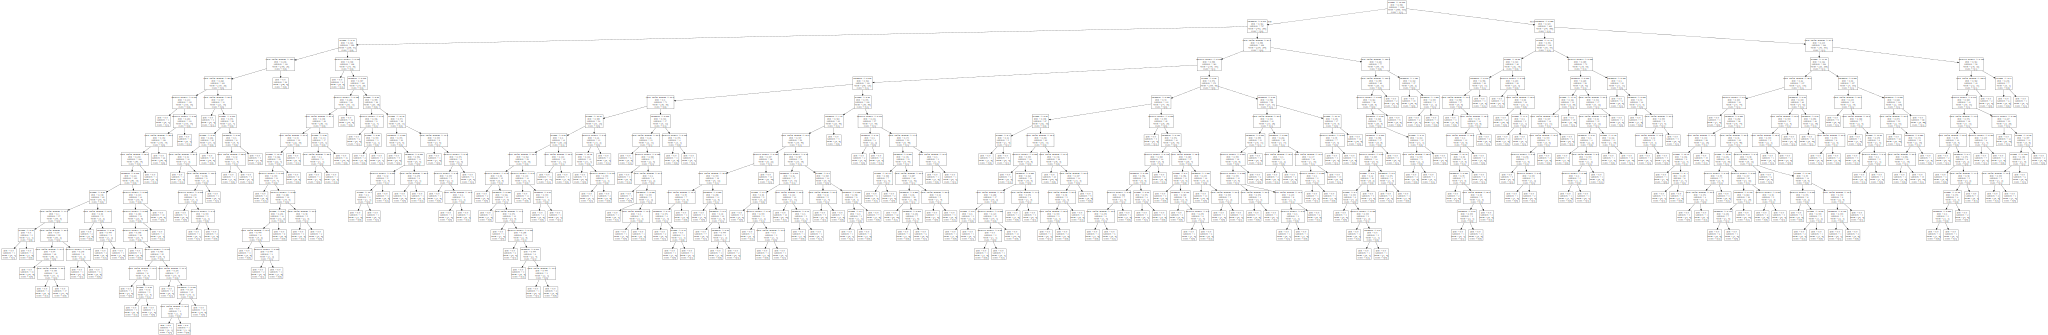

In [66]:
Source(tree.export_graphviz(dt, out_file=None, class_names=True, feature_names= x_train.columns))

In [67]:
# build decision tree with PCA (6 components) - default settings

In [84]:
y = df.loc[:,'quality'].values
x = StandardScaler().fit_transform(df.iloc[:,0:-1])

pca1 = PCA(n_components=6)
pc1 = pca1.fit_transform(x)

print(pca1.explained_variance_ratio_)
print(pca1.explained_variance_ratio_.sum())

[0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439]
0.8552471350764371


In [137]:
x = pc1
y = df['quality']   

def decTreeScorepca6():
    begin_time = datetime.datetime.now()
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

    dt = DecisionTreeClassifier(criterion ='entropy',max_depth =4,random_state = 42) 
    dt.fit(x_train, y_train) 

    y_pred = dt.predict(x_test)
    accuracy=accuracy_score(y_test, y_pred)
    timespent=datetime.datetime.now()-begin_time
    return accuracy,timespent


In [138]:
# above PCA with decision tree will have diff accuracy, hence we did a loop to see the average accuracy and time.

In [139]:
runs = 100 #to loop through and get average timing,and average accuracy to be more accurate
totaltime = datetime.timedelta()
totaltime1 = datetime.timedelta()
totalaccuracy1=0.00;
for i in np.arange(1, runs, 1):
    totalaccuracy,totaltime=decTreeScorepca6()
    totalaccuracy1=totalaccuracy1+totalaccuracy
    totaltime1=totaltime1+totaltime

print('Average Time for decision tree processing:',totaltime1/runs)
print('Average accuracy for decision tree processing:',totalaccuracy1/runs)
from sklearn.metrics import confusion_matrix
confusion_matrix (y_test, y_pred, labels = [1,0])

Average Time for decision tree processing: 0:00:00.006606
Average accuracy for decision tree processing: 0.6558750000000008


array([[164,  58],
       [ 55, 123]], dtype=int64)

#From the 3 models above, the decision tree with above 20% correlation (pearson correlation)with default settings,
#yields the best efficiency and accuracy, among the 3.

To play around with the best match as per below:

In [146]:
data1 = df.loc[:,['volatile acidity','total sulfur dioxide', 'sulphates', 'alcohol']] # independent variables
target1 = df['quality']  # dependent variable: y
data1

# import train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data1, target1, random_state = 42)

# import decision tree model from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
def decTreeScorePC(crit = 'entropy',  maxDepth = None, minSamples = 1, minSplit = 2,random_state = 42):
    dt = DecisionTreeClassifier(criterion = crit, max_depth = maxDepth, min_samples_leaf = minSamples, 
                                 min_samples_split = minSplit, random_state= 42) 
    dt.fit(x_train, y_train) # train our model
    y_pred = dt.predict(x_test) # let the model predict the test data
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    return accuracy


In [141]:
decTreeScorePC(crit = 'gini')

0.7175


0.7175

In [142]:
begin_time = datetime.datetime.now()
decTreeScorePC()
timespent=datetime.datetime.now()-begin_time
print(timespent)

0.7475
0:00:00.012505


In [143]:
for i in np.arange(1, 15, 1): #1 to 14
    decTreeScorePC(maxDepth = i)
    
# from the result we see that when maximum depth allowed is 10, the accuracy score is highest. 
#however, it might be overfitting, hence i will limit it to 4.

0.66
0.66
0.705
0.7175
0.705
0.7175
0.6875
0.7325
0.725
0.7475
0.7325
0.74
0.745
0.7325


In [147]:
for i in np.arange(1, 15, 1):
    decTreeScorePC(minSamples = i)

# when the minimum samples allowed in a leaf is 1, the accuracy score is the highest

0.7475
0.7225
0.7125
0.6675
0.6875
0.6625
0.69
0.695
0.715
0.7125
0.7275
0.72
0.7325
0.7375


In [56]:
for i in np.arange(2, 15,1): 
    decTreeScorePC(minSplit = i)

0.7475
0.735
0.7275
0.7175
0.735
0.72
0.705
0.72
0.715
0.705
0.7025
0.695
0.6875


In [121]:
begin_time = datetime.datetime.now()
decTreeScorePC(maxDepth = 4, minSamples = 1, minSplit = 2)
timespent=datetime.datetime.now()-begin_time
print(timespent)

0.7175
0:00:00.008995


In [108]:
#best combination

In [144]:
data1 = df.loc[:,['volatile acidity','total sulfur dioxide', 'sulphates', 'alcohol']] # independent variables
target1 = df['quality']  # dependent variable: y
data1

def decTreeScorebest():
    begin_time = datetime.datetime.now()
    x_train, x_test, y_train, y_test = train_test_split(data1, target1, random_state = 42)

    dt = DecisionTreeClassifier(criterion ='entropy',max_depth =4, min_samples_leaf = 1, 
                                 min_samples_split = 2,random_state = 42)
    dt.fit(x_train, y_train) 

    y_pred = dt.predict(x_test)
    accuracy=accuracy_score(y_test, y_pred)
    timespent=datetime.datetime.now()-begin_time
    return accuracy,timespent  

from sklearn.metrics import confusion_matrix
confusion_matrix (y_test, y_pred, labels = [1,0])

array([[164,  58],
       [ 55, 123]], dtype=int64)

In [145]:
runs = 100 #to loop through and get average timing,and average accuracy to be more accurate
totaltime = datetime.timedelta()
totaltime1 = datetime.timedelta()
totalaccuracy1=0.00;
for i in np.arange(1, runs, 1):
    totalaccuracy,totaltime=decTreeScorebest()
    totalaccuracy1=totalaccuracy1+totalaccuracy
    totaltime1=totaltime1+totaltime

print('Average Time for decision tree processing:',totaltime1/runs)
print('Average accuracy for decision tree processing:',totalaccuracy1/runs)

Average Time for decision tree processing: 0:00:00.004937
Average accuracy for decision tree processing: 0.7103250000000007
